<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## We will start with importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

Let us import the data

In [2]:
dataset = pd.read_csv('advertising.csv')

In [4]:
# Let us see the data
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Let us get the description and info of dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Let us first explore the data from this table.
On an average a person spends 65 units of time on website. 
The normal users have age of 36

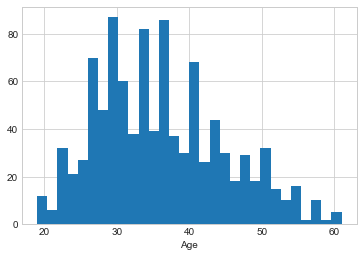

In [10]:
# let us explore the age with histogram
sns.set_style('whitegrid')
dataset['Age'].hist(bins=30)
plt.xlabel('Age')

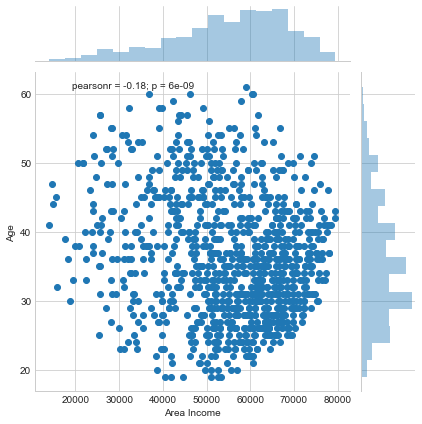

In [11]:
# Let us see the relation between Area income and Age using jointplot
sns.jointplot(x='Area Income',y='Age',data=dataset)

 We can see that the people with higher income tends to be lower the age. Thats the interesting point. Since usually we have an assumptiom of More income with higher age where as this is just inverse of what are oftenly assume.

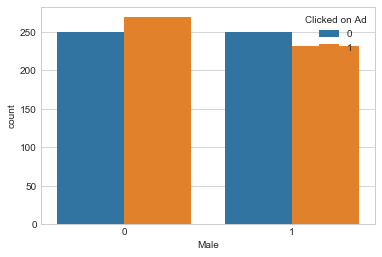

In [18]:
# Let us see the ad usaege with gender, and daily time spent on site
sns.countplot(x='Male', hue='Clicked on Ad',data=dataset)

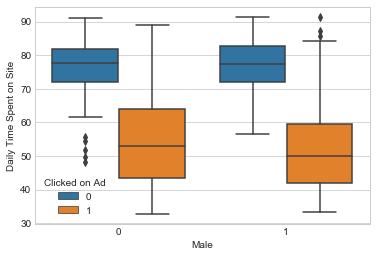

In [19]:
sns.boxplot(x='Male', y = 'Daily Time Spent on Site', hue ='Clicked on Ad', data=dataset)

It means that the females and males that spend more time on the website are actually not going to click on the ads.
On an average if a male spends 50 units of time on website then its more likely to get an ad clickes.
For females this time is 53 units. 

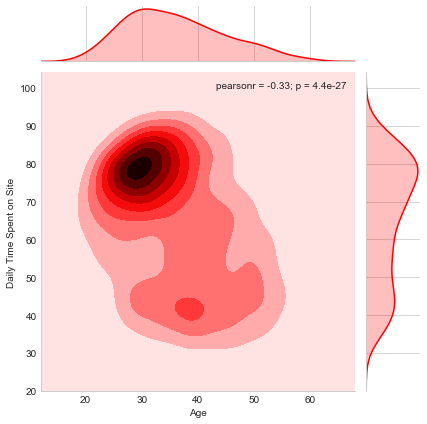

In [21]:
# Let us see which age group spen most time on the website
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=dataset,color='red',kind='kde');

So our main customer are of age 26 to 39

### Now Let us compare the time spent on site vs the time spend on internet

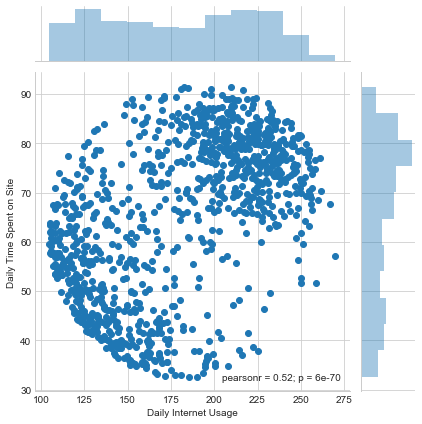

In [22]:
sns.jointplot(x= 'Daily Internet Usage', y ='Daily Time Spent on Site', data=dataset)

### Now its time to plot all the features wuth ads clicked hue

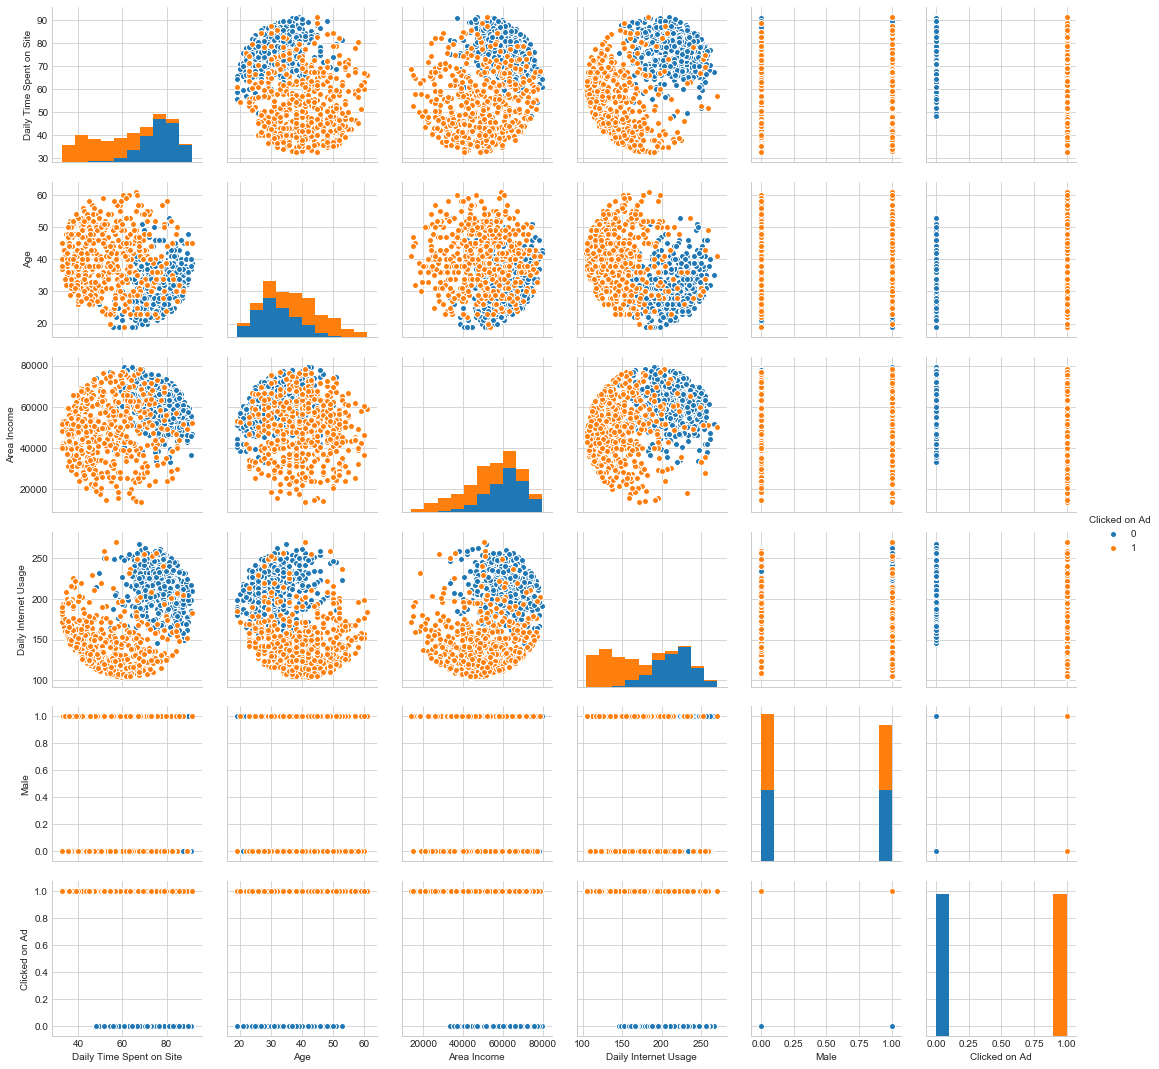

In [24]:
sns.pairplot(dataset, hue='Clicked on Ad')

### Time to get our logistic regression 

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X = dataset[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = dataset['Clicked on Ad']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=101)

#### Getting our model and training it

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
# Fitting the model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Let us predict 
pred = model.predict(X_test)

#### Let us evaluate our model

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.95      0.92       134
          1       0.94      0.88      0.91       116

avg / total       0.92      0.92      0.92       250



### We got a good F1 score